# <div align="center">Data Science</div>
## <div align="center">CSC 487	</div>

### <div align="center">CROP RECOMMENDATION SYSTEM</div>

<br><br><br>

| Student Name        | Enrolment No      | Class and Section |
| ------------------- | ----------------- | ----------------- |
| M Tauheed Hussain   | 01-134212-137     | BSCS 6D           |
| M Saad Afzal        | 01-134212-137     | BSCS 6D           |

<br><br><br>


<br>
<br>
<br>

##### <div align="center">Department of Computer Science</div>
##### <div align="center">BAHRIA UNIVERSITY, ISLAMABAD</div>
<p style="page-break-after:always;"></p>

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [33]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [34]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [35]:
df.iloc[:,:-1].skew()

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

In [36]:
df.shape

(2200, 8)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [38]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [39]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [40]:
df.duplicated().sum()

0

In [41]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [42]:
df.iloc[:,0:-1]

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


### Data Visualization

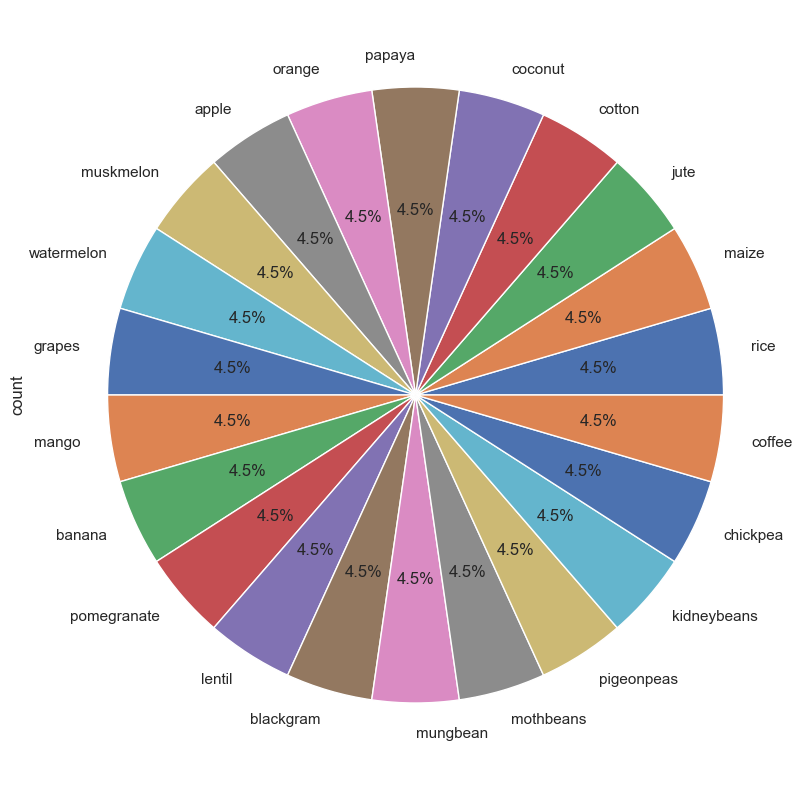

In [43]:
plt.figure(figsize=(10,10))
df['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()

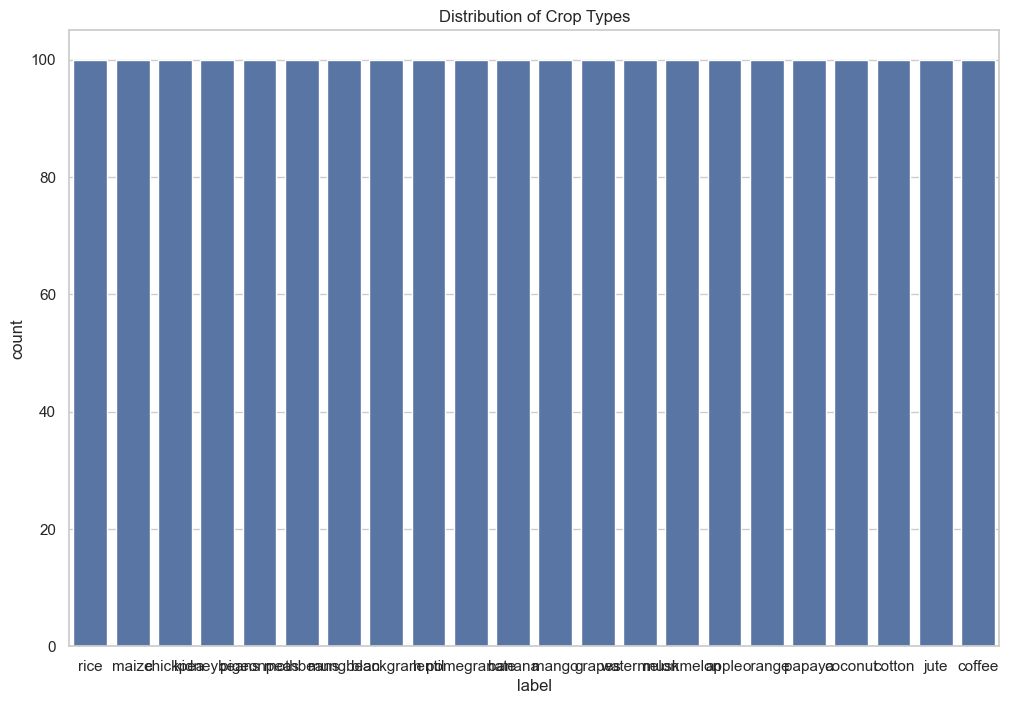

In [44]:
plt.figure(figsize=(12, 8))
sns.countplot(x='label', data=df)
plt.title('Distribution of Crop Types')
plt.show()

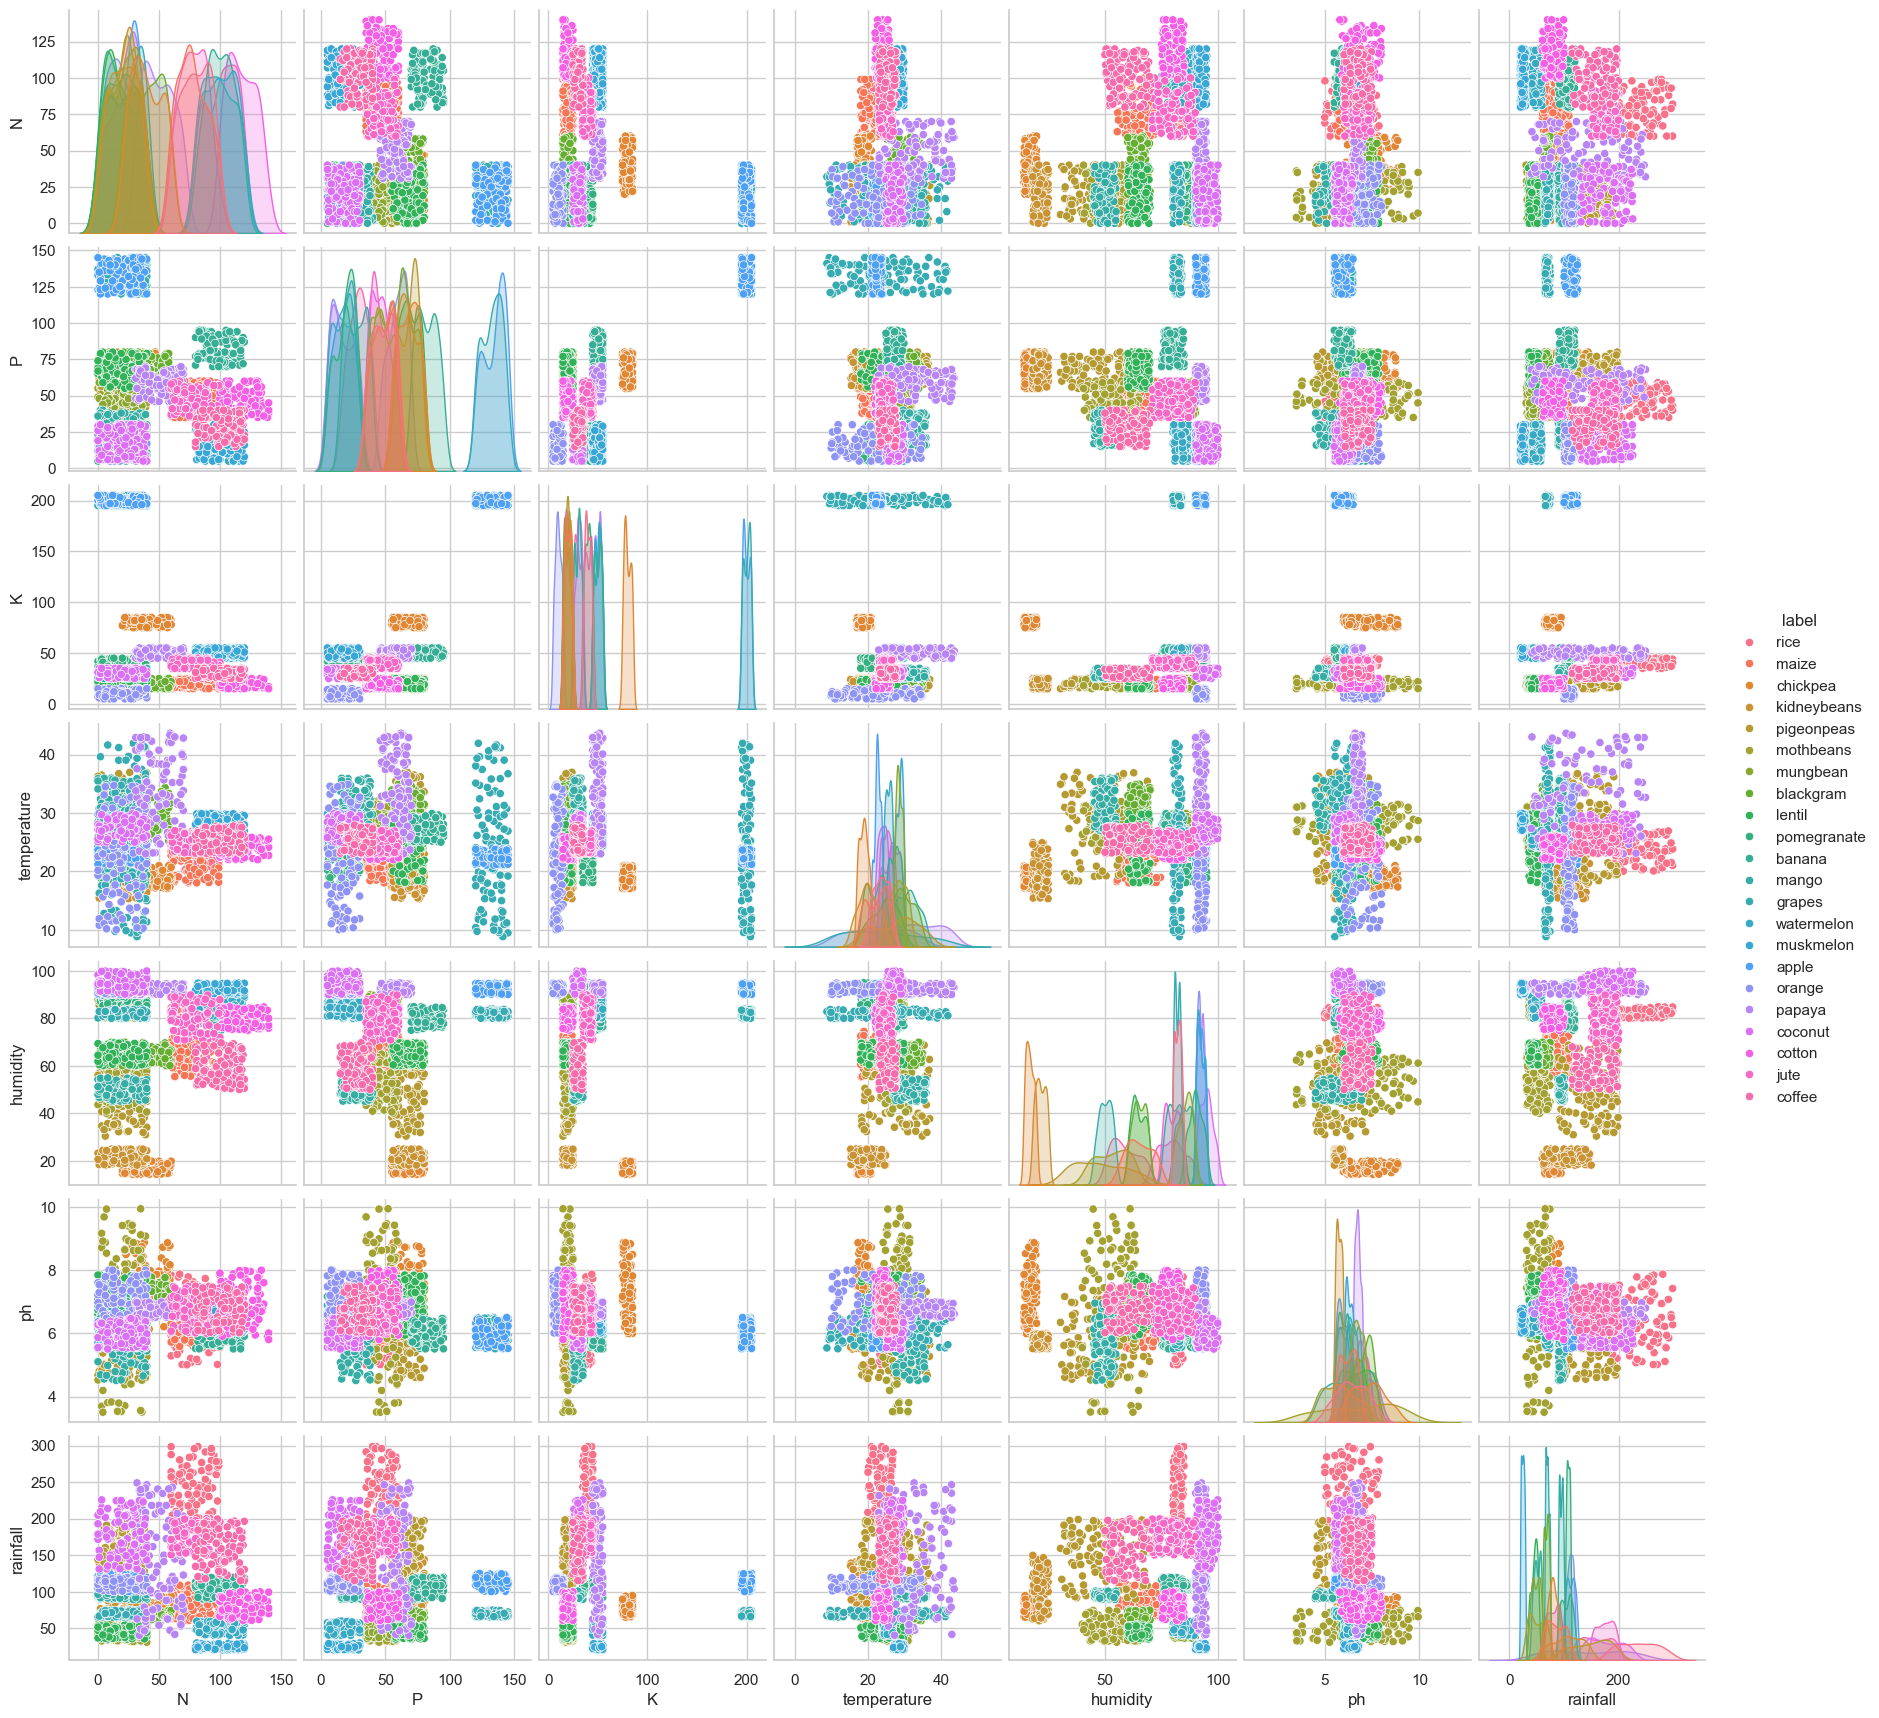

In [45]:
sns.pairplot(df, hue='label', diag_kind='kde')
plt.show()


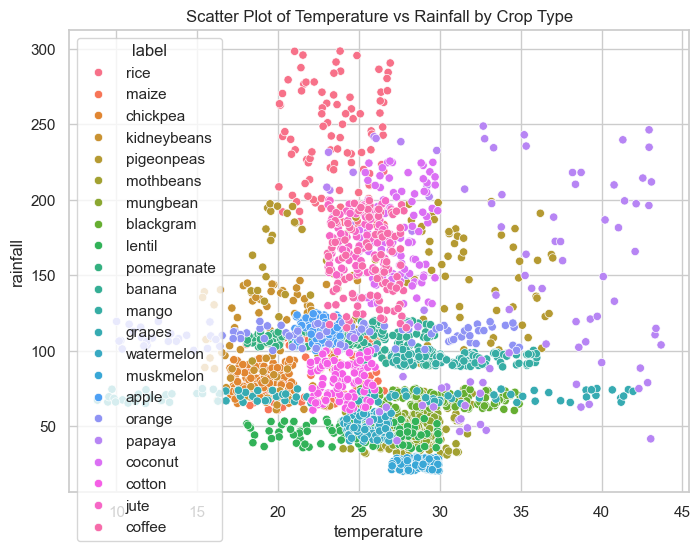

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='rainfall', hue='label', data=df)
plt.title('Scatter Plot of Temperature vs Rainfall by Crop Type')
plt.show()

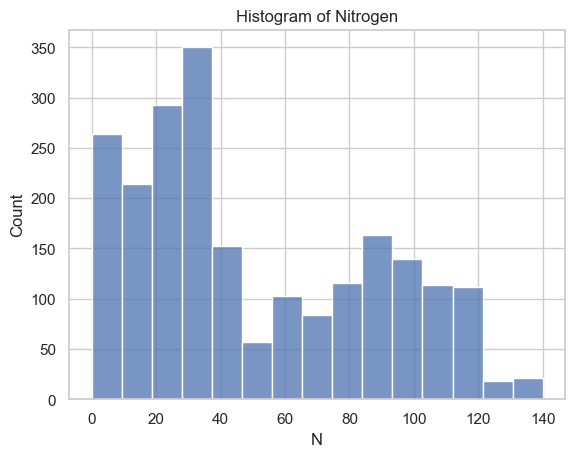

In [47]:
sns.histplot(df['N'])
plt.title('Histogram of Nitrogen')
plt.show()

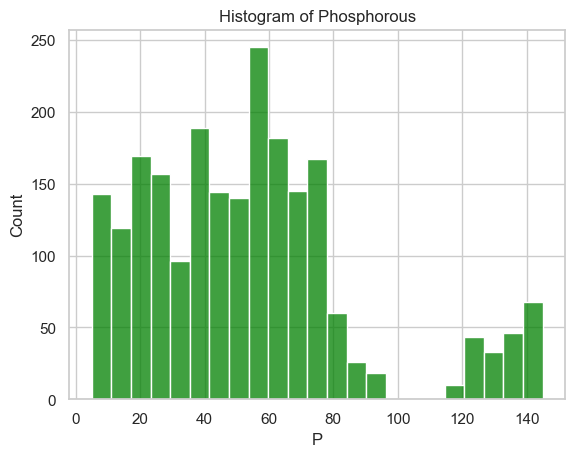

In [48]:
sns.histplot(df['P'],color='Green')
plt.title('Histogram of Phosphorous')
plt.show()

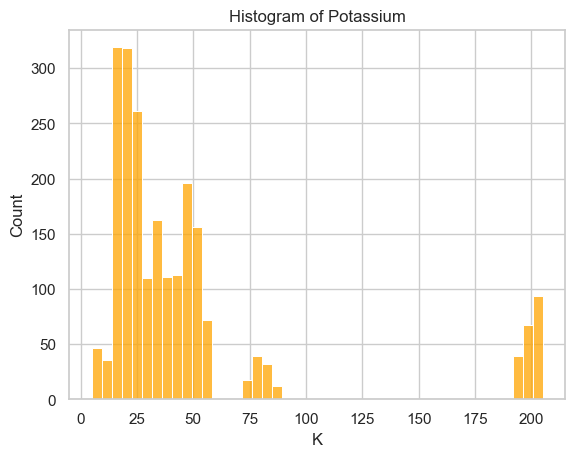

In [49]:
sns.histplot(df['K'],color='Orange')
plt.title('Histogram of Potassium')
plt.show()

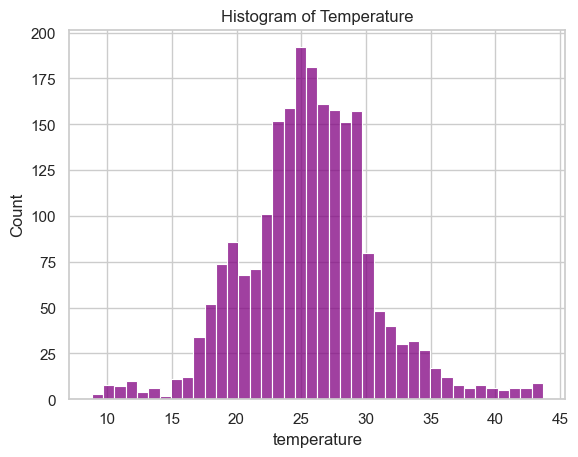

In [50]:
sns.histplot(df['temperature'],color='Purple')
plt.title('Histogram of Temperature')
plt.show()

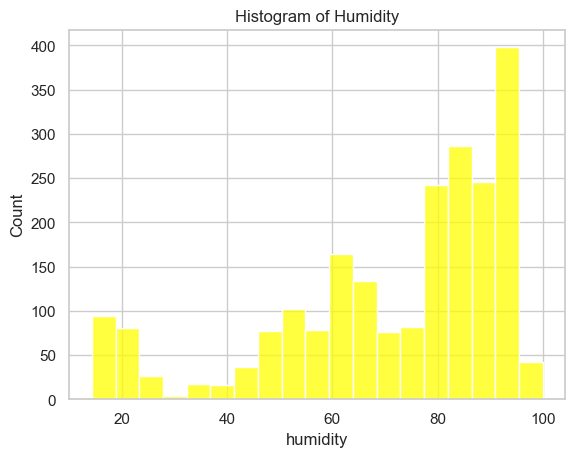

In [51]:
sns.histplot(df['humidity'],color='Yellow')
plt.title('Histogram of Humidity')
plt.show()

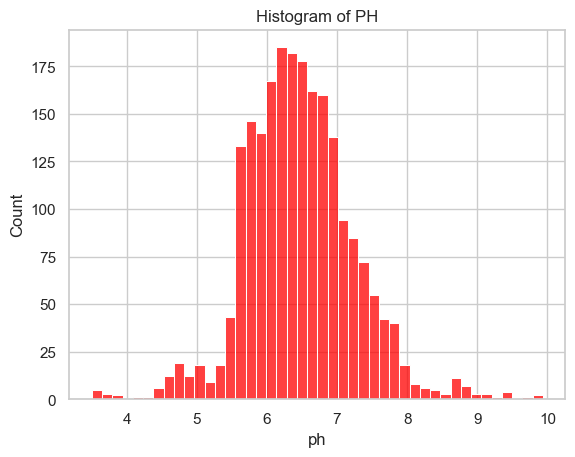

In [52]:
sns.histplot(df['ph'],color='Red')
plt.title('Histogram of PH')
plt.show()

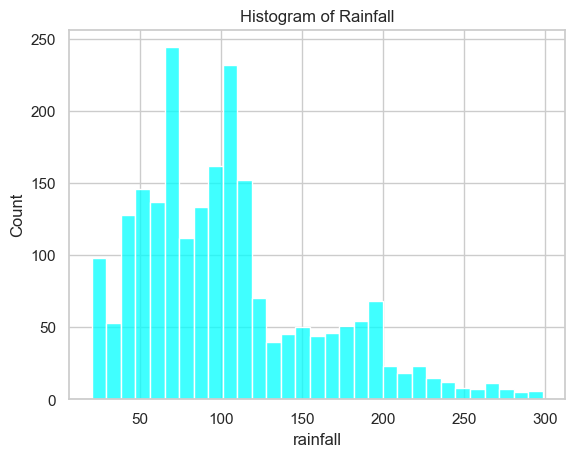

In [53]:
sns.histplot(df['rainfall'],color='Cyan')
plt.title('Histogram of Rainfall')
plt.show()

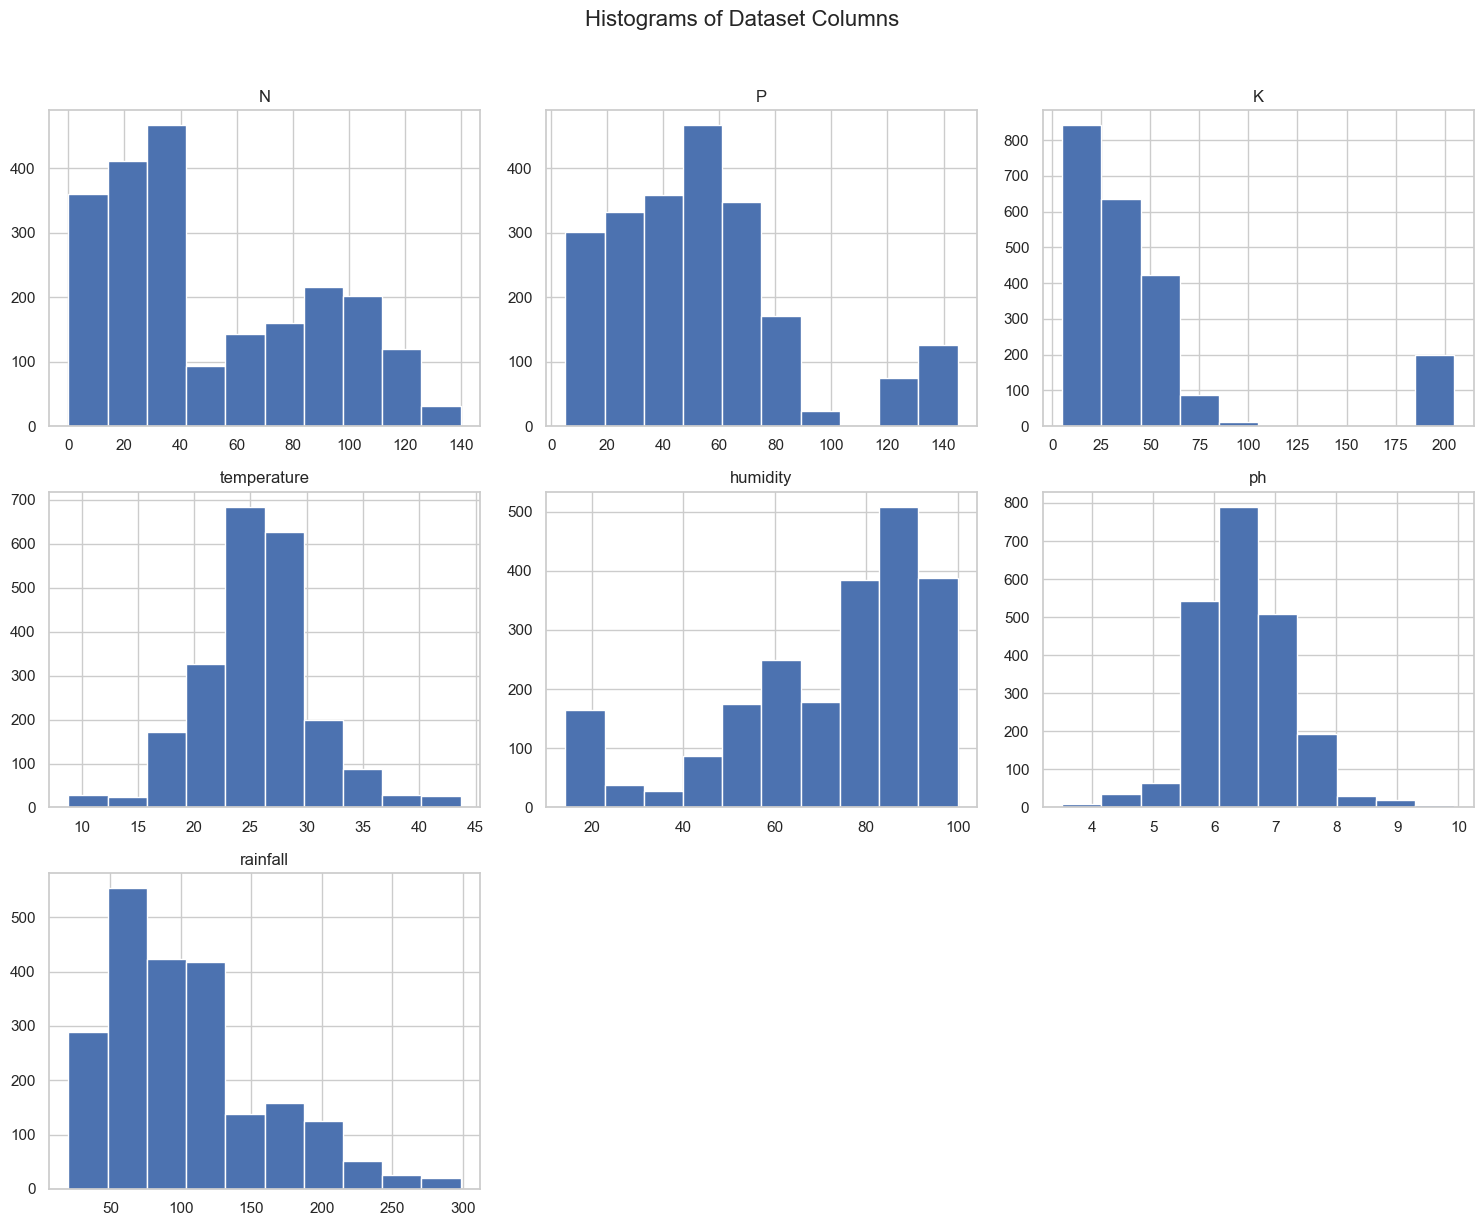

In [54]:
# Plot histograms for all columns
df.hist(figsize=(15, 12), bins=10)
plt.suptitle('Histograms of Dataset Columns', y=1.02, size=16)
plt.tight_layout()
plt.show()

### DEALING WITH OUTLIERS

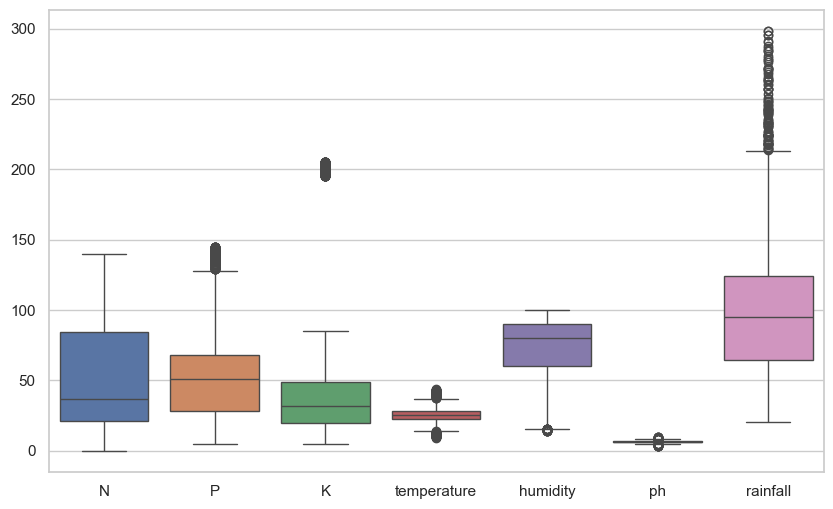

In [55]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

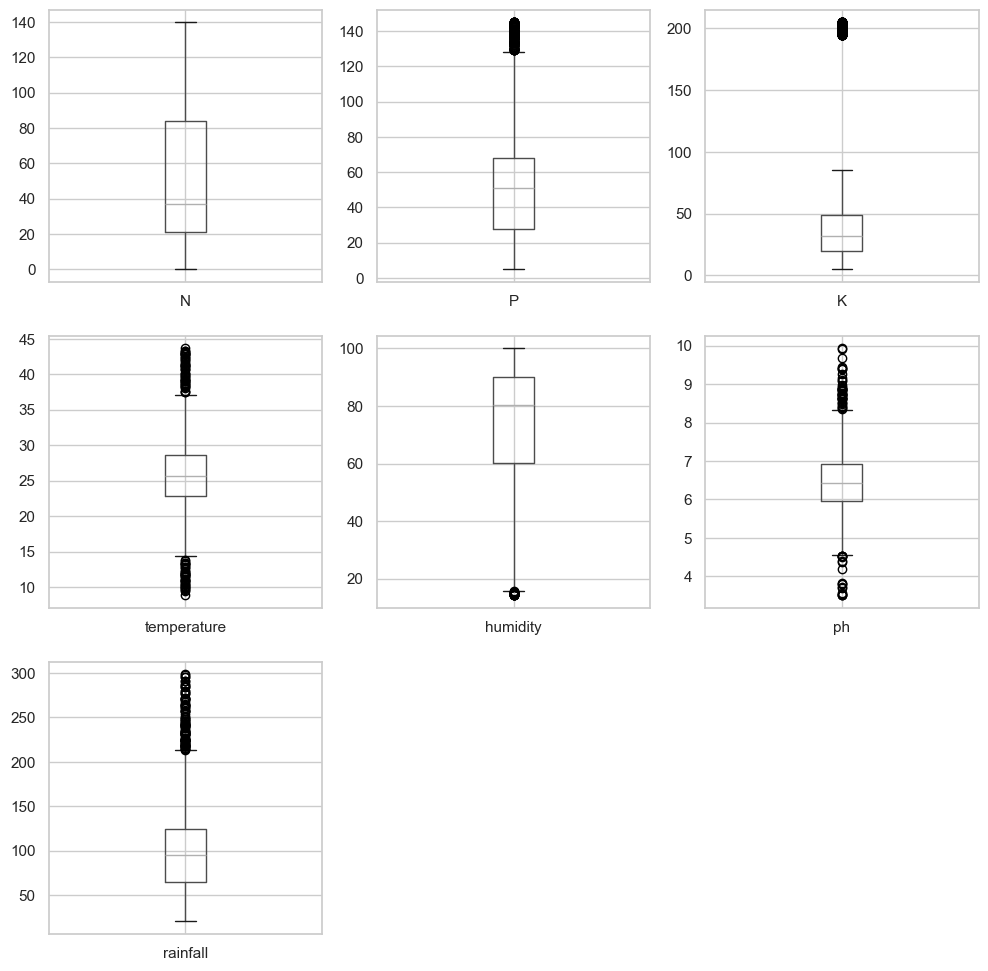

In [56]:
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:-1]:
    plt.subplot(3,3,i)
    df[[col]].boxplot()
    i+=1

In [57]:
#Finding Outliers in dataset
from scipy.stats import zscore

z_scores = zscore(df.iloc[:,:-1])

#threshold for outlier detection
threshold = 3

#Indices of outliers
outlier_indices = (z_scores > threshold).any(axis=1)

#Rows with outliers
outliers = df[outlier_indices]
outliers

,N,P,K,temperature,humidity,ph,rainfall,label
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
12,78,58,44,26.800796,80.886848,5.108682,284.436457,rice
16,85,38,41,21.587118,82.788371,6.249051,276.655246,rice
19,88,35,40,23.579436,83.587603,5.853932,291.298662,rice
26,97,59,43,26.359272,84.044036,6.286500,271.358614,rice
...,...,...,...,...,...,...,...,...
1758,40,49,47,42.933686,91.175675,6.501521,246.361327,papaya
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,papaya
1766,63,58,50,43.037143,94.642890,6.720744,41.585659,papaya
1778,35,68,45,42.936054,90.094481,6.612430,234.846611,papaya


In [58]:
#outliers using IQR method
data_no_label=df.iloc[:,:-1]
median = data_no_label.median()
Q1 = data_no_label.quantile(0.25)
Q3 = data_no_label.quantile(0.75)
IQR = Q3 - Q1

outlier_indices_iqr = ((data_no_label < (Q1 - 1.5 * IQR)) | (data_no_label > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_indices_iqr
outlier_indices_iqr.sum()

432

zscore give 155 outliers and IQR gives 432 outliers. The no of outliers is too large so another we have to find another way of handling outliers. 

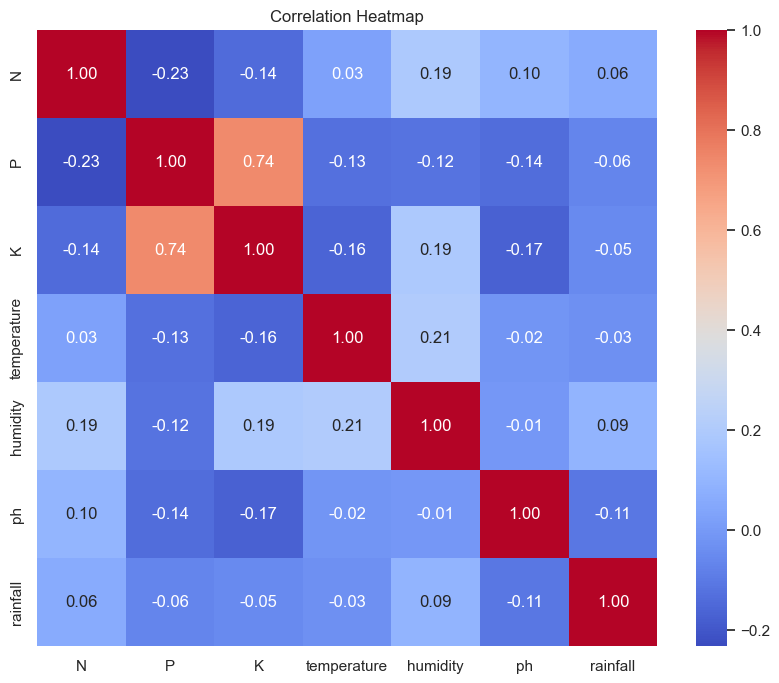

In [59]:
correlation_matrix = df.iloc[:,:-1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Strong positive correlations:

Temperature and humidity: This makes sense, as warmer temperatures typically lead to higher humidity levels. The correlation coefficient of 0.74 in the heatmap indicates a strong positive linear relationship.

Potassium and pH: This suggests that higher levels of potassium are associated with higher pH levels. The correlation coefficient of 0.60 is moderately strong.

#### Strong negative correlations:

Temperature and rainfall: This is likely because warmer temperatures often lead to drier conditions and less rainfall. The correlation coefficient of -0.40 indicates a moderate negative relationship.

Humidity and rainfall: Similar to the temperature-rainfall relationship, higher humidity levels are often associated with lower rainfall amounts. The correlation coefficient of -0.23 is a weak to moderate negative relationship.

#### Weak or no correlations:

pH and rainfall: There appears to be little to no linear relationship between pH and rainfall in this dataset. The correlation coefficient of 0.03 is close to zero.

Potassium and rainfall: Similar to pH and rainfall, there seems to be no significant linear relationship between potassium and rainfall. The correlation coefficient of -0.05 is very close to zero.


### Converting Categorical varibales to a integer format

In [60]:
# using get_dummies method
df_encoded = pd.get_dummies(df, columns=['label'], prefix='label')

print(df_encoded.head())

    N   P   K  temperature   humidity        ph    rainfall  label_apple  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536        False   
1  85  58  41    21.770462  80.319644  7.038096  226.655537        False   
2  60  55  44    23.004459  82.320763  7.840207  263.964248        False   
3  74  35  40    26.491096  80.158363  6.980401  242.864034        False   
4  78  42  42    20.130175  81.604873  7.628473  262.717340        False   

   label_banana  label_blackgram  ...  label_mango  label_mothbeans  \
0         False            False  ...        False            False   
1         False            False  ...        False            False   
2         False            False  ...        False            False   
3         False            False  ...        False            False   
4         False            False  ...        False            False   

   label_mungbean  label_muskmelon  label_orange  label_papaya  \
0           False            False         False  

In [61]:
crop_dict = { 
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
df['crop_num']=df['label'].map(crop_dict)

In [62]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [63]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,22


In [64]:
df.drop("label",axis=1,inplace=True)
df

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22


In [65]:
# x=df_encoded.iloc[:,0:7]
# y=df_encoded.iloc[:,7:]
# y.head()

In [66]:
x=df.iloc[:,:-1]
y=df["crop_num"]
print(x,y)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns] 0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64


### Train test split

In [67]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=42,test_size=0.3)


In [68]:
x_train.head()

,N,P,K,temperature,humidity,ph,rainfall
1102,21,26,27,27.003155,47.675254,5.699587,95.851183
1159,29,35,28,28.347161,53.539031,6.967418,90.402604
141,60,44,23,24.794708,70.045567,5.722580,76.728601
1004,80,77,49,26.054330,79.396545,5.519088,113.229737
2,60,55,44,23.004459,82.320763,7.840207,263.964248


In [69]:
y_train.head()

1102    12
1159    12
141      2
1004    13
2        1
Name: crop_num, dtype: int64

In [70]:
print("x train shape",x_train.shape)
print("y train shape",y_train.shape)

x train shape (1540, 7)
y train shape (1540,)


## Decision Tree Model

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)


DecisionTreeClassifier()

In [72]:
dtree.score(x_test,y_test)

0.9863636363636363

In [73]:
import pickle
pickle.dump(dtree, open('descision_tree_model.pkl', 'wb'))


In [74]:
import pickle
import pandas as pd
# Load the trained model
loaded_model = pickle.load(open('descision_tree_model.pkl', 'rb'))


In [75]:

custom_test_data = pd.DataFrame({
    'N': [92],
    'P': [42],
    'K': [43],
    'temperature': [21],
    'humidity': [82],
    'ph': [6.5],
    'rainfall': [202],
})



In [76]:
# Make predictions using the loaded model
predictions = loaded_model.predict(custom_test_data)

# Print or use the predictions as needed
print(predictions[0])


1


## Random Forest Classifier Model

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  # Import the metrics module
from sklearn.metrics import classification_report  # Import classification_report

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train, y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)

print("RF's Accuracy is: ", x)

print(classification_report(y_test, predicted_values))


RF's Accuracy is:  0.9924242424242424
              precision    recall  f1-score   support

           1       1.00      0.82      0.90        28
           2       1.00      1.00      1.00        26
           3       0.87      1.00      0.93        34
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        38
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        26
          17       1.00      1.00      1.00

In [78]:
pickle.dump(RF, open('random_forest_model.pkl', 'wb'))